In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import scipy
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy import stats

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/datrain.csv')
test = pd.read_csv('/content/drive/My Drive/datest.csv')
submission = pd.read_csv('/content/drive/My Drive/dasubmission.csv')

In [0]:
train_id = train['id']
test_id = test['id']

In [0]:
#@title Default title text
train.head()

id            type  fiberID  ...  modelMag_r  modelMag_i  modelMag_z
0   0             QSO      601  ...   21.364187   21.020605   21.147340
1   1             QSO      788  ...   20.753925   20.693389   20.512314
2   2             QSO      427  ...   16.641249   16.660177   16.688928
3   3             QSO      864  ...   19.889798   19.758113   19.552855
4   4  STAR_RED_DWARF      612  ...   21.475342   19.487330   18.375655

[5 rows x 23 columns]

In [0]:
#sns.pairplot(u, hue="type", diag_kind="kde")

In [0]:
#sns.pairplot(g, hue="type", diag_kind="kde")

In [0]:
#sns.pairplot(r, hue="type", diag_kind="kde")

In [0]:
#sns.pairplot(i, hue="type", diag_kind="kde")

In [0]:
#sns.pairplot(z, hue="type", diag_kind="kde")

# *modelMag_u*

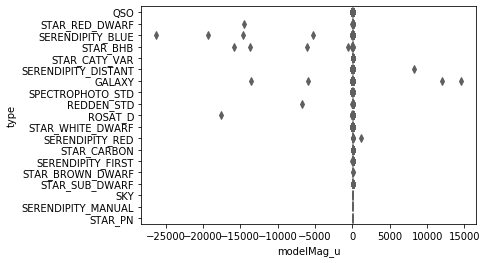

In [0]:
sns.boxplot(y="type", x="modelMag_u", data=train,palette="Set3")
plt.show()


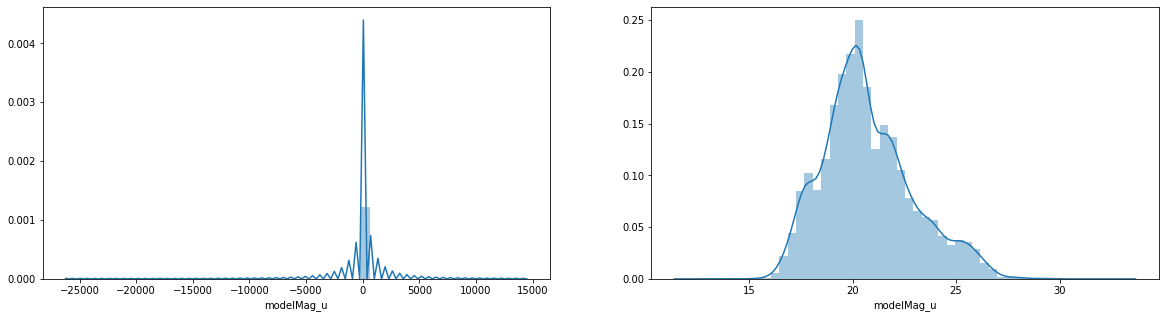

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['modelMag_u'])
plt.subplot(1,2,2)
sns.distplot(test['modelMag_u'])

In [0]:
train[train['modelMag_u'] < -10000]['modelMag_u'].value_counts()

-13554.587890    1
-19365.775430    1
-15873.535321    1
-13644.910224    1
-26236.578659    1
-14506.884282    1
-17519.431576    1
-14644.625679    1
Name: modelMag_u, dtype: int64

In [0]:
train[train['modelMag_u'] > 10000]['modelMag_u'].value_counts()

14488.251976    1
12024.264631    1
Name: modelMag_u, dtype: int64

In [0]:
train.drop(train[train['modelMag_u'] > 10000]['modelMag_u'].index,axis=0,inplace=True)
train.drop(train[train['modelMag_u'] < -10000]['modelMag_u'].index,axis=0,inplace=True)

# modelMag_g

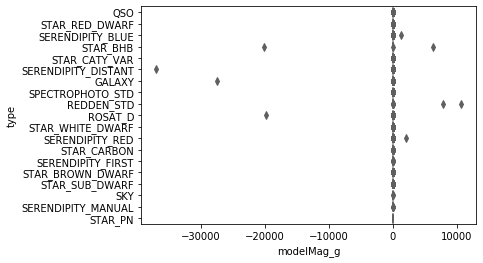

In [0]:
sns.boxplot(y="type", x="modelMag_g", data=train,palette="Set3")
plt.show()


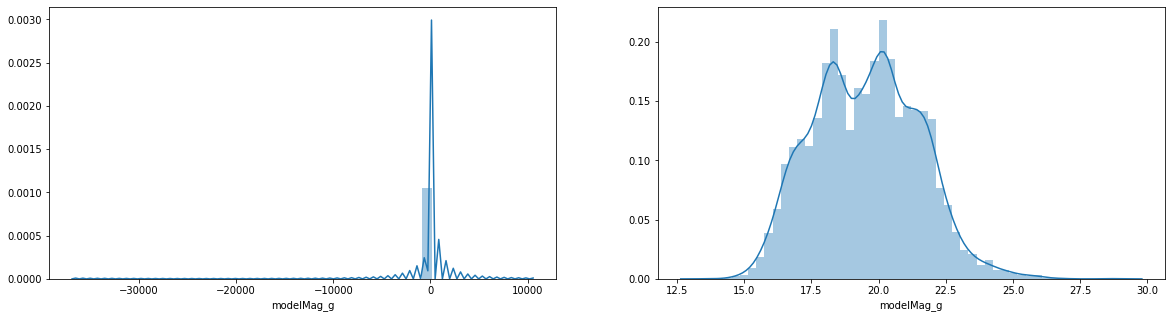

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['modelMag_g'])
plt.subplot(1,2,2)
sns.distplot(test['modelMag_g'])

In [0]:
train[train['modelMag_g'] > 10000]['modelMag_g'].value_counts()
train[train['modelMag_g'] < -10000]['modelMag_g'].value_counts()

-19834.042913    1
-27500.979134    1
-36902.402336    1
-20060.540683    1
Name: modelMag_g, dtype: int64

In [0]:
train.drop(train[train['modelMag_g'] > 10000]['modelMag_g'].index,axis=0,inplace=True)
train.drop(train[train['modelMag_g'] < -10000]['modelMag_g'].index,axis=0,inplace=True)

# modelMag_r

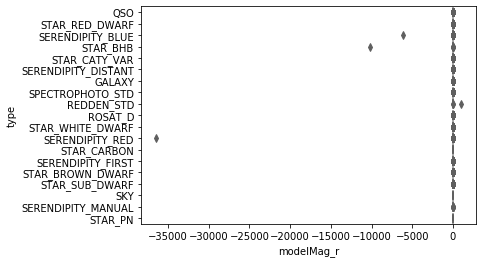

In [0]:
sns.boxplot(y="type", x="modelMag_r", data=train,palette="Set3")
plt.show()

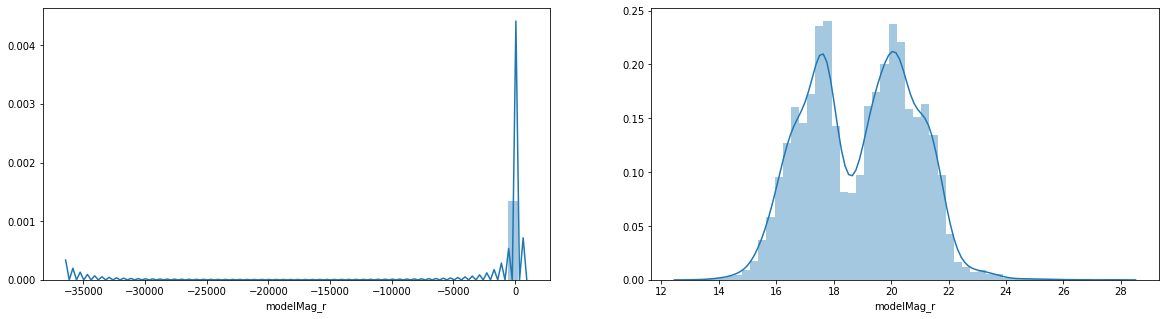

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['modelMag_r'])
plt.subplot(1,2,2)
sns.distplot(test['modelMag_r'])

In [0]:
train[train['modelMag_r'] < -10000]['modelMag_r'].value_counts()

-10234.061250    1
-36439.638493    1
Name: modelMag_r, dtype: int64

In [0]:
train.drop(train[train['modelMag_r'] < -10000]['modelMag_r'].index,axis=0,inplace=True)

# modelMag_i

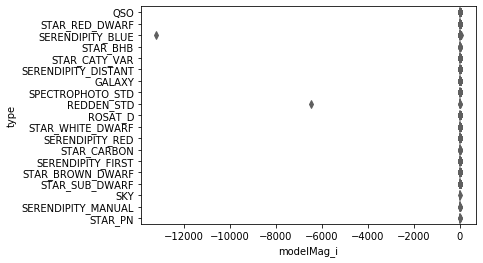

In [0]:
sns.boxplot(y="type", x="modelMag_i", data=train,palette="Set3")
plt.show()

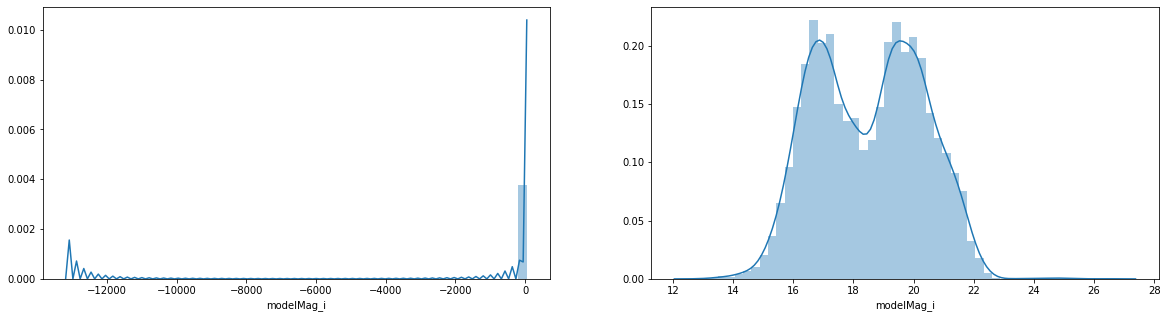

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['modelMag_i'])
plt.subplot(1,2,2)
sns.distplot(test['modelMag_i'])

In [0]:
train[train['modelMag_i'] < -10000]['modelMag_i'].value_counts()

-13187.594059    1
Name: modelMag_i, dtype: int64

In [0]:
train.drop(train[train['modelMag_i'] < -10000]['modelMag_i'].index,axis=0,inplace=True)

# modelMag_z

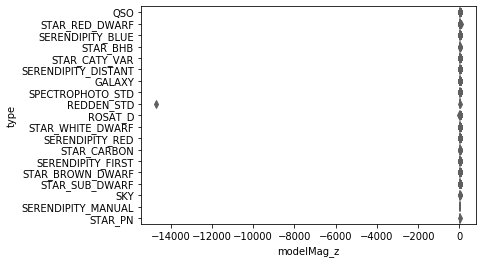

In [0]:
sns.boxplot(y="type", x="modelMag_z", data=train,palette="Set3")
plt.show()

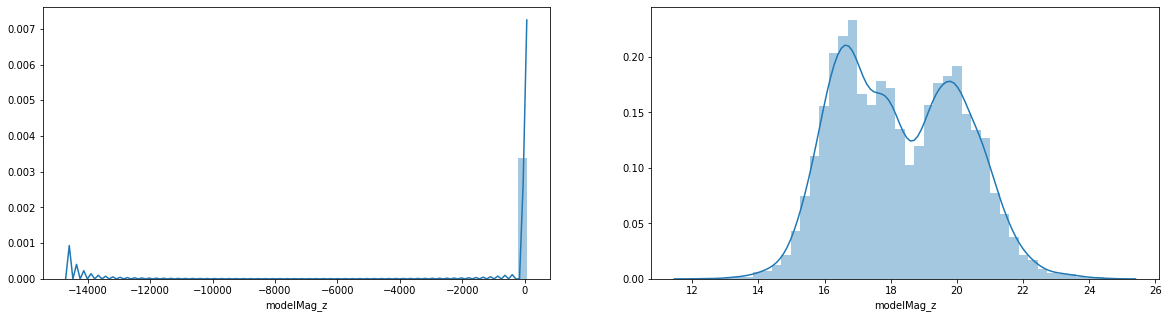

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['modelMag_z'])
plt.subplot(1,2,2)
sns.distplot(test['modelMag_z'])

In [0]:
train[train['modelMag_z'] < -10000]['modelMag_z'].value_counts()

-14702.106038    1
Name: modelMag_z, dtype: int64

In [0]:
train.drop(train[train['modelMag_z'] < -10000]['modelMag_z'].index,axis=0,inplace=True)

In [0]:
train_app = []
test_app = []
for s in ['u','g','r','i','z']:
  x_train, y_train = scipy.stats.boxcox_normplot(train['modelMag_%s'%(s)] , -2, 2)
  x_test, y_test = scipy.stats.boxcox_normplot(test['modelMag_%s'%(s)] , -2, 2)
  y2, l1 = scipy.stats.boxcox(train['modelMag_%s'%(s)])
  y2, l2 = scipy.stats.boxcox(test['modelMag_%s'%(s)])
  train_app.append(l1)
  test_app.append(l2)
  print("train_modelMag_%s"%(s), l1)
  print("test_modelMag_%s"%(s), l2)

train_modelMag_u -0.5852413052336406
test_modelMag_u -1.1088962407491971
train_modelMag_g 0.17322036081771283
test_modelMag_g 0.19307523275564875
train_modelMag_r 0.8545886660406047
test_modelMag_r 0.7812452130878618
train_modelMag_i 0.7796179174333723
test_modelMag_i 0.7165298548980791
train_modelMag_z 0.15454003616369408
test_modelMag_z 0.07318392311864864


In [0]:
from scipy.special import boxcox1p
count=0
for feat in ['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']:
  # transform training data & save lambda value
  train[feat] = boxcox1p(train[feat],train_app[count])
  # use lambda value to transform test data
  test[feat] = boxcox1p(test[feat],test_app[count])
  count = count + 1

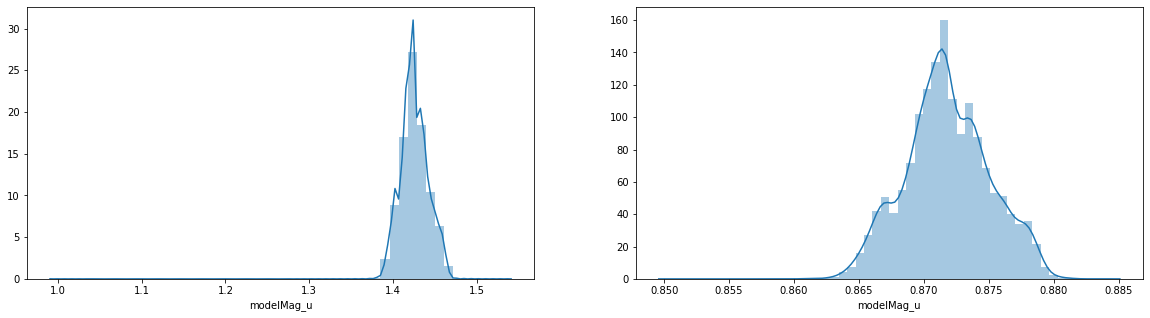

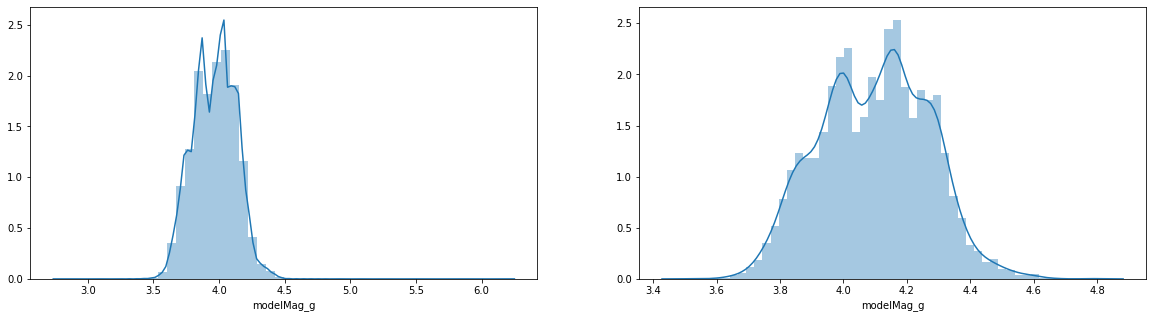

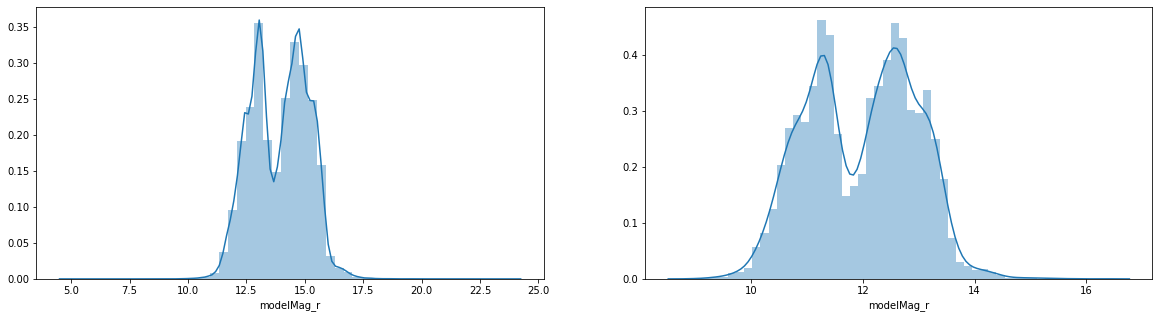

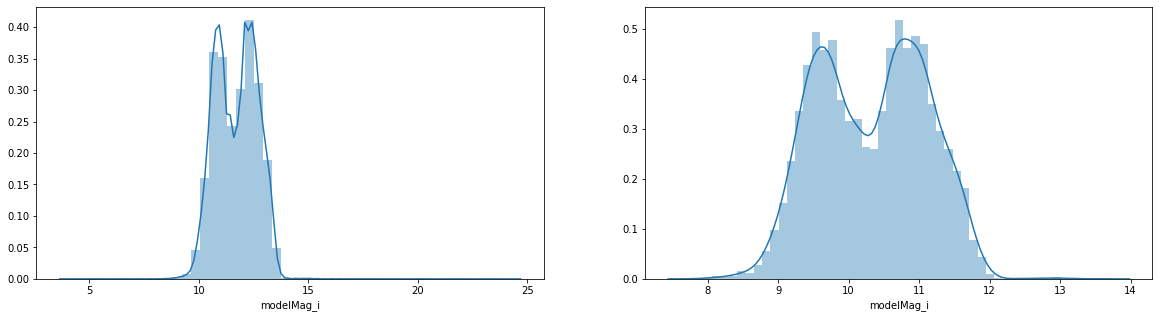

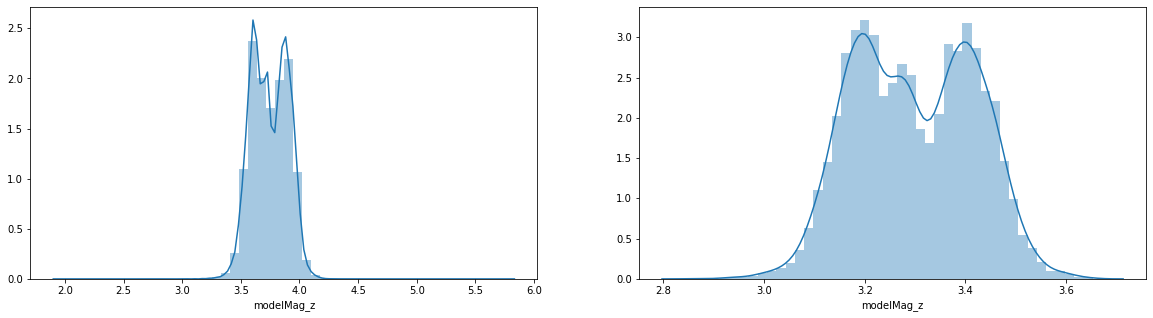

In [0]:
for s in ['u','g','r','i','z']:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.distplot(train['modelMag_%s'%(s)])
  plt.subplot(1,2,2)
  sns.distplot(test['modelMag_%s'%(s)])

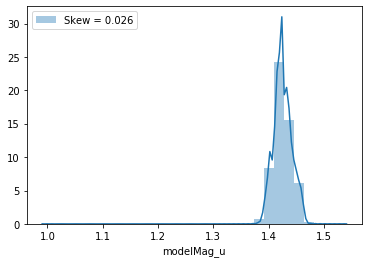

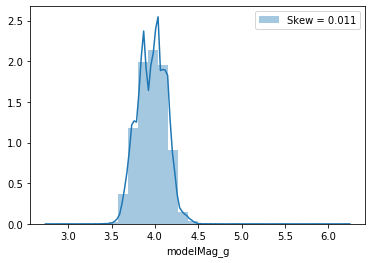

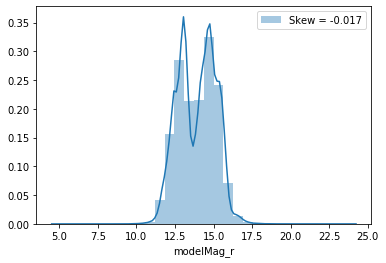

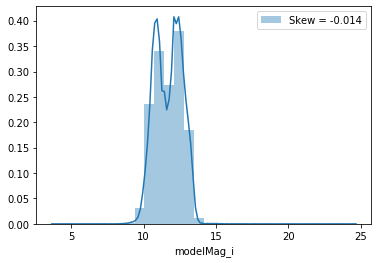

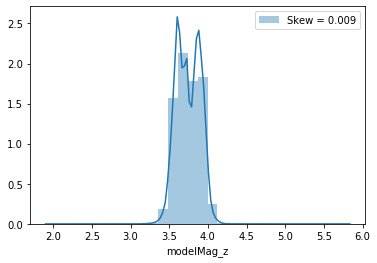

In [0]:
for feat in ['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']:
    skew = train[feat].skew()
    sns.distplot(train[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [0]:
train[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']].describe()

modelMag_u     modelMag_g  ...     modelMag_i     modelMag_z
count  199972.000000  199972.000000  ...  199972.000000  199972.000000
mean        1.425484       3.964750  ...      11.716084       3.745292
std         0.016290       0.161244  ...       0.935186       0.153037
min         0.994965       2.782139  ...       3.905649       1.940925
25%         1.415011       3.847758  ...      10.916634       3.618074
50%         1.424271       3.972383  ...      11.788248       3.737031
75%         1.435922       4.085424  ...      12.471717       3.873833
max         1.536553       6.204720  ...      24.430320       5.792260

[8 rows x 5 columns]

In [0]:
test[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']].describe()

modelMag_u    modelMag_g    modelMag_r    modelMag_i    modelMag_z
count  10009.000000  10009.000000  10009.000000  10009.000000  10009.000000
mean       0.871792      4.096993     11.969815     10.328897      3.298582
std        0.003237      0.170793      0.965479      0.774549      0.120261
min        0.851150      3.513919      8.994784      7.830127      2.857699
25%        0.869736      3.971361     11.187941      9.663489      3.199154
50%        0.871631      4.104118     12.094247     10.387606      3.291996
75%        0.873921      4.226371     12.729439     10.956467      3.399837
max        0.883518      4.796529     16.289123     13.593242      3.652811

In [0]:
train[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']]

modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z
0         1.441040    4.124182   15.485269   13.006652    3.973141
1         1.432390    4.069513   15.096094   12.840841    3.926292
2         1.401985    3.723528   12.429026   10.748214    3.616575
3         1.427062    4.009340   14.542290   12.363826    3.853240
4         1.454149    4.248772   15.555988   12.224842    3.759562
...            ...         ...         ...         ...         ...
199986    1.427157    4.035410   14.622120   12.519296    3.877126
199987    1.465231    4.161011   14.469319   11.968539    3.771977
199988    1.451974    4.156895   14.882809   11.685032    3.672373
199989    1.413667    3.841511   12.953741   11.030664    3.641168
199990    1.426890    4.018568   14.823146   12.598550    3.887256

[199972 rows x 5 columns]

In [0]:
test[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']]

modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z
0        0.877873    4.348429   13.047072   10.329132    3.225079
1        0.874555    4.297289   12.618766   10.882987    3.384364
2        0.871889    4.025251   11.260688    9.728941    3.198671
3        0.871735    4.167744   12.607139   11.055729    3.415873
4        0.877971    4.376272   13.138491   10.645681    3.303931
...           ...         ...         ...         ...         ...
10004    0.870631    4.103704   12.237431   10.704662    3.371417
10005    0.871080    4.109655   12.186573   10.715210    3.359386
10006    0.872589    4.165584   12.602547   10.929173    3.407612
10007    0.873523    4.276057   13.106233   11.566698    3.481118
10008    0.866202    3.824341   10.523062    9.252107    3.148036

[10009 rows x 5 columns]

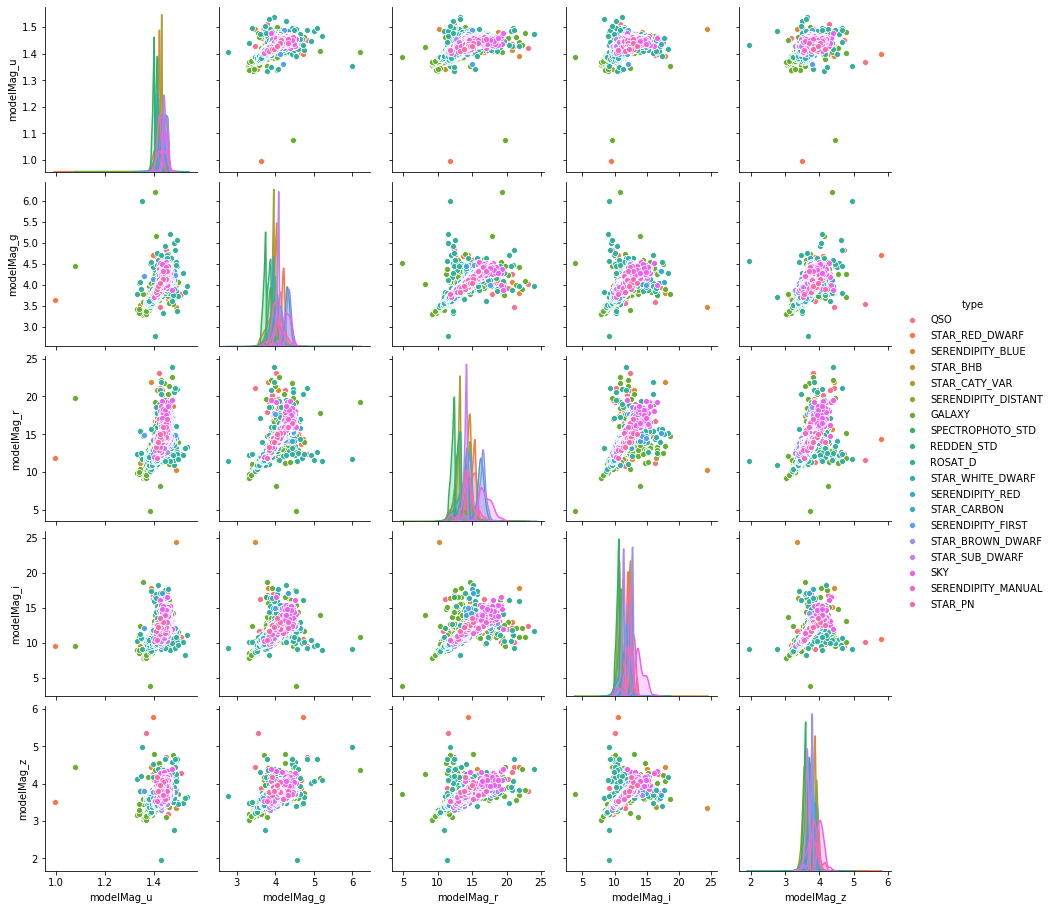

In [0]:
sns.pairplot(train[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','type']],hue='type')

In [0]:
for data in [train,test]:
  data['modelMag_u*g'] = data['modelMag_u'] * data['modelMag_g']
  data['modelMag_u*r'] = data['modelMag_u'] * data['modelMag_r']
  data['modelMag_u*i'] = data['modelMag_u'] * data['modelMag_i']
  data['modelMag_u*z'] = data['modelMag_u'] * data['modelMag_z']

  data['modelMag_g*r'] = data['modelMag_g'] * data['modelMag_r']
  data['modelMag_g*i'] = data['modelMag_g'] * data['modelMag_i']
  data['modelMag_g*z'] = data['modelMag_g'] * data['modelMag_z']

  data['modelMag_r*i'] = data['modelMag_r'] * data['modelMag_i']
  data['modelMag_r*z'] = data['modelMag_r'] * data['modelMag_z']

  data['modelMag_i*z'] = data['modelMag_i'] * data['modelMag_z']

In [0]:
train.columns

Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'modelMag_u*g', 'modelMag_u*r', 'modelMag_u*i',
       'modelMag_u*z', 'modelMag_g*r', 'modelMag_g*i', 'modelMag_g*z',
       'modelMag_r*i', 'modelMag_r*z', 'modelMag_i*z'],
      dtype='object')

In [0]:
train_modelMag= train.drop(train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z']], axis=1)

In [0]:
test_modelMag= test.drop(test[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z']], axis=1)

In [0]:
modelMag_diverse = train_modelMag[['id', 'type', 'fiberID', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'modelMag_u*g', 'modelMag_u*r', 'modelMag_u*i',
       'modelMag_u*z', 'modelMag_g*r', 'modelMag_g*i', 'modelMag_g*z',
       'modelMag_r*i', 'modelMag_r*z', 'modelMag_i*z']]

In [0]:
modelMag_diverse.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199972 entries, 0 to 199990
Data columns (total 18 columns):
id              199972 non-null int64
type            199972 non-null object
fiberID         199972 non-null int64
modelMag_u      199972 non-null float64
modelMag_g      199972 non-null float64
modelMag_r      199972 non-null float64
modelMag_i      199972 non-null float64
modelMag_z      199972 non-null float64
modelMag_u*g    199972 non-null float64
modelMag_u*r    199972 non-null float64
modelMag_u*i    199972 non-null float64
modelMag_u*z    199972 non-null float64
modelMag_g*r    199972 non-null float64
modelMag_g*i    199972 non-null float64
modelMag_g*z    199972 non-null float64
modelMag_r*i    199972 non-null float64
modelMag_r*z    199972 non-null float64
modelMag_i*z    199972 non-null float64
dtypes: float64(15), int64(2), object(1)
memory usage: 34.0+ MB


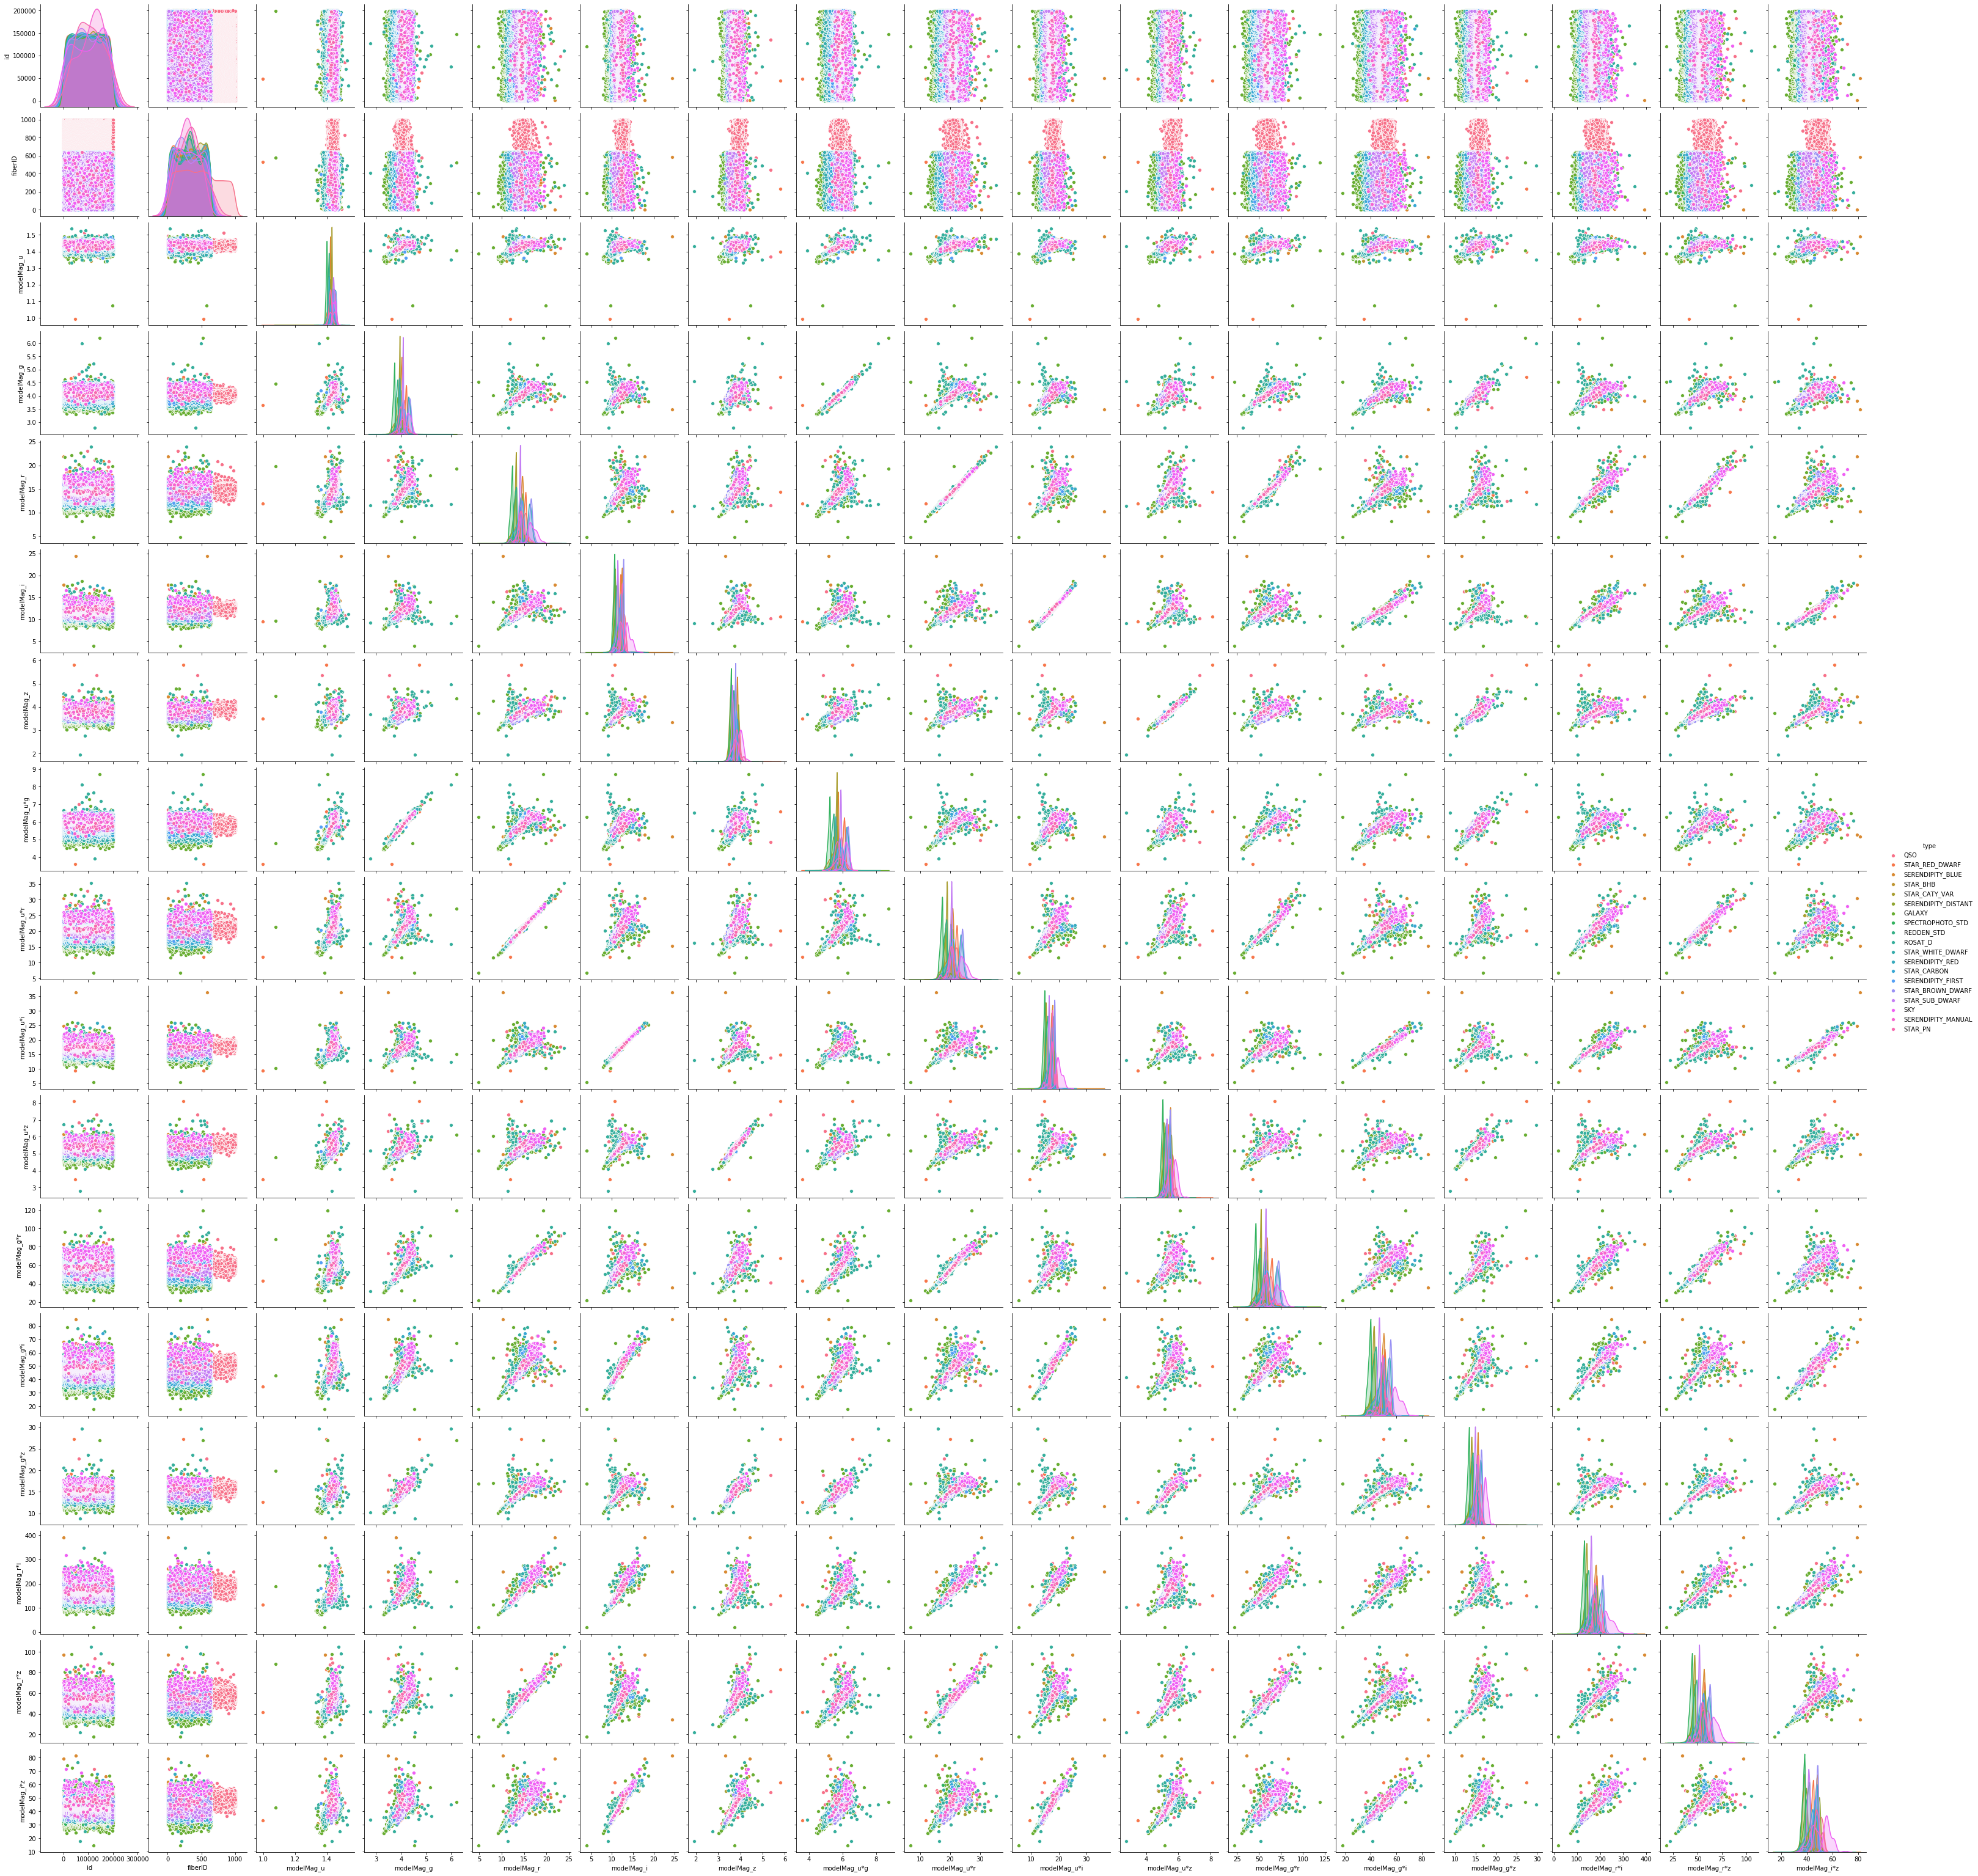

In [0]:
sns.pairplot(modelMag_diverse,hue='type')

In [0]:
modelMag_diverse.to_csv('/content/drive/My Drive/modelMag_diverse_train.csv')
test_modelMag.to_csv('/content/drive/My Drive/modelMag_diverse_test.csv')

In [0]:
modelMag_diverse.isnull().sum()

id              0
type            0
fiberID         0
modelMag_u      0
modelMag_g      0
modelMag_r      0
modelMag_i      0
modelMag_z      0
modelMag_u*g    0
modelMag_u*r    0
modelMag_u*i    0
modelMag_u*z    0
modelMag_g*r    0
modelMag_g*i    0
modelMag_g*z    0
modelMag_r*i    0
modelMag_r*z    0
modelMag_i*z    0
dtype: int64

In [0]:
test_modelMag.isnull().sum()

id              0
fiberID         0
modelMag_u      0
modelMag_g      0
modelMag_r      0
modelMag_i      0
modelMag_z      0
modelMag_u*g    0
modelMag_u*r    0
modelMag_u*i    0
modelMag_u*z    0
modelMag_g*r    0
modelMag_g*i    0
modelMag_g*z    0
modelMag_r*i    0
modelMag_r*z    0
modelMag_i*z    0
dtype: int64